In [0]:
import math
import numpy as np
import matplotlib.pyplot as plt
import heapq


Text(0.5, 1.0, 'Fourier interpolate and denoised fourier interpolate, 4 coeff')

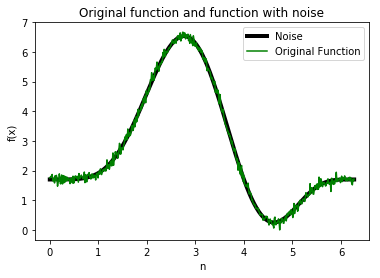

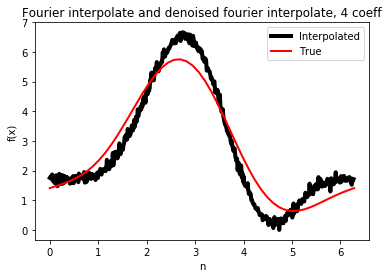

In [34]:
# Function
f = lambda x: (-1/5)*(((x * (2 * math.pi - x))/(10))**5) * (x + 1.5) * (x + 2.5) * (x - 4) + 1.7

# Number of points
n = 512
# Number of coeff
nSmall = 4

# Random noise
noise = np.random.normal(0,1,n)
noise = 0.1 * noise

# Set of evenly spaced points
xs = np.arange(n)*(2*np.pi/n)

# Function values
fs = f(xs) + noise

# Fourier stuff
fk = np.fft.fft(fs)/n
ck = np.fft.fftshift(fk)
k  = np.arange(-n/2,n/2)

# Getting smallest values and update ck
index = heapq.nsmallest(nSmall, enumerate(ck), key=lambda x: x[1])

ckNew = np.zeros(len(ck),dtype=complex)

#ckNew[252] = ck[252]
#ckNew[253] = ck[253]
ckNew[254] = ck[254]
ckNew[255] = ck[255]
ckNew[256] = ck[256]
ckNew[257] = ck[257]
#ckNew[258] = ck[258]
#ckNew[259] = ck[259]
#ckNew[260] = ck[260]
#ckNew[261] = ck[261]


# Fourier stuff
x = np.linspace(0,2*np.pi)
fint = 0*1j*x 
for j in range(n):
  fint += ckNew[j]*np.exp(1j*k[j]*x)

# Plots
fig1, ax1 = plt.subplots()  
  
ax1.plot(xs, f(xs), 'k', linewidth=4)
ax1.plot(xs, f(xs) + noise, 'g-')
ax1.legend({'Original Function', 'Noise'})
ax1.set_xlabel('n')
ax1.set_ylabel('f(x)')
ax1.set_title('Original function and function with noise')

fig2, ax2 = plt.subplots()

ax2.plot(xs, f(xs) + noise, 'k', linewidth = 4)
ax2.plot(x, np.real(fint), 'r', linewidth = 2)
ax2.legend({'True','Interpolated'})
ax2.set_xlabel('n')
ax2.set_ylabel('f(x)')
ax2.set_title('Fourier interpolate and denoised fourier interpolate, %s coeff' % nSmall)
